A empresa Dream Housing Finance lida com todos os tipos de empréstimos à habitação. Eles estão presentes em todas as áreas urbanas, semi-urbanas e rurais. O cliente primeiro solicita um empréstimo à habitação e depois a empresa valida a elegibilidade do cliente para o empréstimo.

A empresa deseja automatizar o processo de elegibilidade do empréstimo (em tempo real) com base nos detalhes do cliente fornecidos durante o preenchimento do formulário de inscrição on-line. Esses detalhes são sexo, estado civil, escolaridade, número de dependentes, renda, valor do empréstimo, histórico de crédito e outros. Para automatizar esse processo, eles forneceram um conjunto de dados para identificar os segmentos de clientes elegíveis para o valor do empréstimo, para que possam atingir especificamente esses clientes. 

In [1]:
# Importando o Pandas
import pandas as pd

In [2]:
# Importando as bases
treino = pd.read_csv(r'C:\Users\wggso\OneDrive\Documentos\Data_Science\Predict Loan Eligibility for Dream Housing Finance company\train.csv')

teste = pd.read_csv(r'C:\Users\wggso\OneDrive\Documentos\Data_Science\Predict Loan Eligibility for Dream Housing Finance company\test.csv')
treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Desde o início, já vou fazer os mesmos tratamentos nas bases de treino e teste

In [3]:
#Importando a biblioteca ydata-profiling e criando o relatório de visualização da base de treino
from ydata_profiling import ProfileReport

#abrindo o arquivo de treino no ydata
profile = ProfileReport(treino, title="Emprestimo")
profile.to_file("Emprestimo.html")

c:\Users\wggso\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 222.43it/s]


### Tratando valores nulos

In [4]:
# Identificando colunas com valores nulos
treino.isnull().sum().sort_values(ascending=False).head(10)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
Loan_ID              0
Education            0
ApplicantIncome      0
dtype: int64

Credit_History

In [5]:
# Identificando os valores
treino.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [6]:
# Vamos considerar que todos os valores nulos são 0
treino['Credit_History'].fillna(0, inplace=True)
teste['Credit_History'].fillna(0, inplace=True)

Self_Employed

In [7]:
# Identificando os valores
treino.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [8]:
# Vamos considerar que todos os valores nulos são "No"
treino['Self_Employed'].fillna("No", inplace=True)
teste['Self_Employed'].fillna("No", inplace=True)

LoanAmount

In [9]:
# Identificando os valores
treino.LoanAmount.value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [10]:
# identificando a média da coluna
treino.LoanAmount.mean()

146.41216216216216

In [11]:
# vamos substituir os valores nulos pela média da coluna
treino['LoanAmount'].fillna(treino.LoanAmount.mean(), inplace=True)
teste['LoanAmount'].fillna(teste.LoanAmount.mean(), inplace=True)

Dependents

In [12]:
# Identificando os valores
treino.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
# Vamos considerar que os valores nulos são 0
treino['Dependents'].fillna(0, inplace=True)
teste['Dependents'].fillna(0, inplace=True)

Loan_Amount_Term

In [14]:
treino.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [15]:
# Calculando a média da coluna
treino.Loan_Amount_Term.mean()

342.0

In [16]:
# Vamos substituir os valores nulos pela média da coluna
treino['Loan_Amount_Term'].fillna(treino.Loan_Amount_Term.mean(), inplace=True)
teste['Loan_Amount_Term'].fillna(teste.Loan_Amount_Term.mean(), inplace=True)

Gender

In [17]:
# Identificando os valores
treino.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [18]:
# Identificando a moda
treino.Gender.mode()

0    Male
Name: Gender, dtype: object

In [19]:
# Vamos substituir os valores nulos pela moda da coluna
treino['Gender'].fillna('Male', inplace=True)
teste['Gender'].fillna('Male', inplace=True)

Married

In [20]:
# verificando os valores
treino.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
# Identificando a moda da coluna
treino.Married.mode()

0    Yes
Name: Married, dtype: object

In [22]:
# Vamos substituir os valores nulos pela moda da coluna
treino['Married'].fillna('Yes', inplace=True)
teste['Married'].fillna('Yes', inplace=True)

 Validando se foram tratadas todas as colunas

In [23]:
# base treino
treino.isnull().sum().sort_values(ascending=False).head(10)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [24]:
# base teste
teste.isnull().sum().sort_values(ascending=False).head(10)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

#### Tratamento dos tipos das colunas

In [25]:
# Verificando os tipos dos dados
treino.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

identifiquei que a coluna de *Dependents* esta com o tipo *incorreto*, vamos tratar

In [26]:
# identificando valores
treino.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
0      15
Name: count, dtype: int64

Nesse caso não conseguimos fazer uma média, mas sabemos que os valores 3+ são de 3 dependetes pra cima<br>
- inicialmente vou considerar os valores como 3 padrão, mas vamos voltar nessa coluna posteriormente

In [27]:
# Alterando os valores e mudando o tipo da coluna
treino['Dependents'] = treino['Dependents'].apply(lambda x: 3 if x == "3+" else x).astype(int)
teste['Dependents'] = teste['Dependents'].apply(lambda x: 3 if x == "3+" else x).astype(int)

treino.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Tratar Outliers

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Definindo função para identificar outliers
def limites(coluna):
        q1 = coluna.quantile(0.25)
        q3 = coluna.quantile(0.75)
        amplitude = q3 - q1
        return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [30]:
# Definindo função para criar os gráficos
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, kde=False)
    sns.kdeplot(coluna, color="red")
    plt.show()
    
def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index ,y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

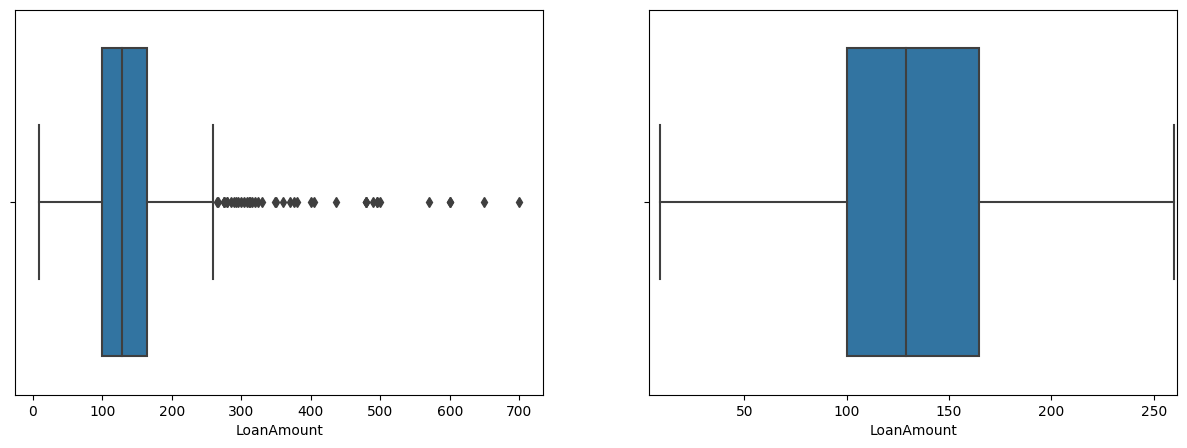

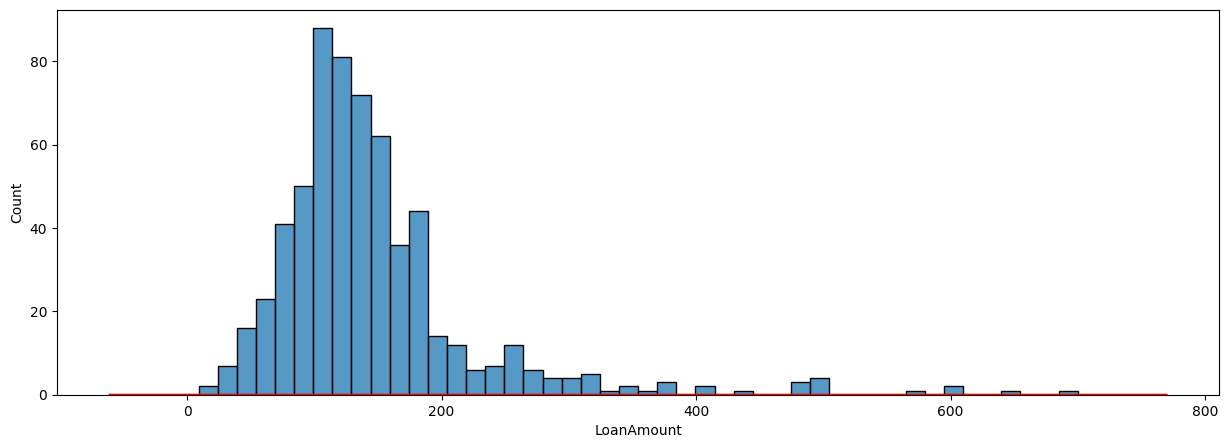

In [31]:
# Visualizando a coluna LoanAmount
diagrama_caixa(treino['LoanAmount'])
histograma(treino['LoanAmount'])

### A princípio decidi manter os outliers
- Base de dados pequena;
- Vou testar na parte 2 desse projeto, tratando os outliers.

### Encoding

In [32]:
treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Gender
- Male
- Female

In [33]:
# Mapear "Masculino" para 0 e "Feminino" para 1 e alterando o tipo da coluna
mapeamento = {'Male': 0, 'Female': 1}
treino['Gender'] = treino['Gender'].map(mapeamento).astype(int)
# Base teste
teste['Gender'] = teste['Gender'].map(mapeamento).astype(int)

treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Married	
- Yes
- No

In [34]:
# Mapear "No" para 0 e "Yes" para 1 e alterando o tipo da coluna
valor_bool = {'No': 0, 'Yes': 1}
treino['Married'] = treino['Married'].map(valor_bool).astype(int)
# Base teste
teste['Married'] = teste['Married'].map(valor_bool).astype(int)

treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Self_Employed
- Yes
- No

In [35]:
# Mapear "No" para 0 e "Yes" para 1 e alterando o tipo da coluna
treino['Self_Employed'] = treino['Self_Employed'].map(valor_bool).astype(int)
# Base teste
teste['Self_Employed'] = teste['Self_Employed'].map(valor_bool).astype(int)

treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


Education
- Graduate
- Not Graduate

In [36]:
# Mapear "Not Graduate" para 0 e "Graduate" para 1 e alterando o tipo da coluna
Graduate = {'Not Graduate': 0, 'Graduate': 1}
treino['Education'] = treino['Education'].map(Graduate).astype(int)
# Base teste
teste['Education'] = teste['Education'].map(Graduate).astype(int)

treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


Property_Area

In [37]:
# Aplicando one-hot encoding
treino = pd.get_dummies(treino, columns=['Property_Area'], dtype=int)
teste = pd.get_dummies(teste, columns=['Property_Area'], dtype=int)

treino

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Y,0,0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,N,1,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Y,0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Y,0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Y,1,0,0
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,Y,1,0,0
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Y,0,0,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Y,0,0,1


### Agora vamos treinar o modelo

Podemos agora selecionar um modelo para classificar esses dados
*Para começar, vamos testar entre:*

*Árvore de classificação*
https://scikit-learn.org/stable/modules/tree.html#classification

* kneighbors KNeighborsClassifier*
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

*Regressão Logística*
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [38]:
#Definindo x e y da nossa base de treino
x = treino.drop(['Loan_ID','Loan_Status'], axis=1)
y = treino.Loan_Status

In [39]:
# Importando a biblioteca
from sklearn.model_selection import train_test_split

#separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

*usando árvore de decisão*

In [40]:
#importando a biblioteca
from sklearn import tree

#Criando o classificador
modelo_ac = tree.DecisionTreeClassifier(random_state=42)

#fazendo os fit com os dados
modelo_ac = modelo_ac.fit(X_train, y_train)

#criando a previsão
y_predict_ac = modelo_ac.predict(X_val)

*Usando KNeighborsClassifier*

In [41]:
#importando a biblioteca
from sklearn.neighbors import KNeighborsClassifier

#criando classificador
modelo_knn = neigh = KNeighborsClassifier(n_neighbors=3)

#fazendo os fit com os dados
modelo_knn = modelo_knn.fit(X_train, y_train)

#criando a previsão
y_predict_knn = modelo_knn.predict(X_val)

*Usando regressão logistica*

In [42]:
#importandoa  biblioteca
from sklearn.linear_model import LogisticRegression

#criando o classificador
modelo_rl = LogisticRegression(random_state=42)

#fazendo fit com os dados
modelo_rl = modelo_rl.fit(X_train, y_train)

#criando a previsão
y_predict_rl = modelo_rl.predict(X_val)

c:\Users\wggso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*E, para finalizar, vamos avaliar esses modelos*
*Para fazer essa análise, podemos usar:*
        Acurácia (método de avaliação usado na competição):

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

Matriz de confusão (ajuda a visualizar a distribuição dos erros):

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [43]:
# importando a biblioteca
from sklearn.metrics import accuracy_score

In [44]:
#para árvore
resultado_ac = accuracy_score(y_val, y_predict_ac)

In [45]:
#para knn
resultado_knn = accuracy_score(y_val, y_predict_knn)

In [46]:
#para rl
resultado_rl = accuracy_score(y_val, y_predict_rl)

*Avaliando a matriz de confusão*

In [47]:
# importando a biblioteca
from sklearn.metrics import confusion_matrix

In [48]:
#para árvore
confusion_matrix(y_val, y_predict_ac)

array([[ 34,  38],
       [ 29, 102]], dtype=int64)

In [49]:
#Para knn
confusion_matrix(y_val, y_predict_knn)

array([[ 13,  59],
       [ 22, 109]], dtype=int64)

In [50]:
#para lr
confusion_matrix(y_val, y_predict_rl)

array([[ 23,  49],
       [  7, 124]], dtype=int64)

In [51]:
df_resultados = pd.DataFrame({
    'Modelo': ['Modelo Árvore', 'Modelo Knn', 'Modelo Regressão'],
    'Acurácia': [resultado_ac, resultado_knn, resultado_rl]
})
df_resultados

,Modelo,Acurácia
0,Modelo Árvore,0.669951
1,Modelo Knn,0.600985
2,Modelo Regressão,0.724138


In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Suponha que você tenha seu conjunto de dados e seus recursos (X) e rótulos (y)

# Crie uma instância do modelo que você deseja avaliar, por exemplo, Regressão Logística
modelo_rl2 = LogisticRegression()

# Crie um objeto KFold com o número desejado de dobras (k)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Neste exemplo, usamos 5 dobras

# Realize a validação cruzada
resultados = cross_val_score(modelo_rl2, x, y, cv=kfold, scoring='accuracy')

# Exiba os resultados da validação cruzada
print("Acurácia Média:", resultados.mean())
print("Desvio Padrão dos Resultados:", resultados.std())

Acurácia Média: 0.7492336398773825
Desvio Padrão dos Resultados: 0.02934885385240196


c:\Users\wggso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wggso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Usando o modelo na base de teste

In [53]:
#vamos precisar removaer a coluna de Loan_ID da base de teste
x_teste = teste.drop(['Loan_ID'], axis=1)

#utilizando o modelo de regresão logísitca na base de teste
y_predict = modelo_rl.predict(x_teste)

#criando coluna com a previsão na base de teste
teste['Loan_Status'] = y_predict

#Selecionando somente as colunas Survived e PassangerId da base de teste
base_envio = teste[['Loan_ID', 'Loan_Status']]

#exportar para csv
base_envio.to_csv('resultado.csv', index=False)

Nosso resultado no Vidhya foi de  *0.743055555555556*